# Movie Recommender System using Movie Lens Dataset

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the Data Files

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

#### Exploratory Data Analysis

In [3]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


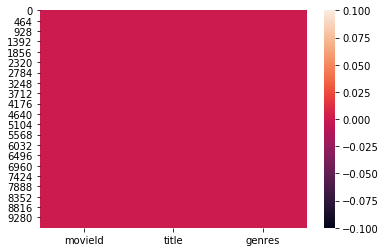

In [7]:
sns.heatmap(movies.isna())

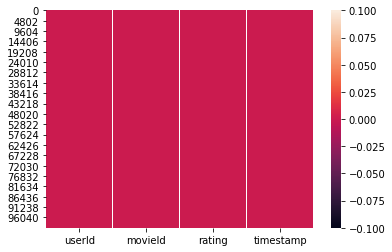

In [8]:
sns.heatmap(ratings.isna())

#### Feature Engineering

In [9]:
movie_info = pd.merge(movies, ratings, on = "movieId")

In [10]:
movie_info.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


#### Dropping unnecessary columns for building collaborative filtering Recommender System

In [11]:
movie_info.drop(["genres", "timestamp"], axis =1, inplace = True)

In [12]:
movie_info.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [13]:
ratings_count = movie_info.groupby("title")["rating"].count().sort_values(ascending = False)

In [14]:
ratings_count

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [15]:
no_of_ratings = ratings_count.reset_index()

In [16]:
no_of_ratings

,title,rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,Late Night Shopping (2001),1
9715,Late Night with Conan O'Brien: The Best of Tri...,1
9716,"Late Shift, The (1996)",1
9717,Latter Days (2003),1


In [17]:
no_of_ratings.rename(columns = {"rating" : "rating count"}, inplace= True)

In [18]:
no_of_ratings

,title,rating count
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,Late Night Shopping (2001),1
9715,Late Night with Conan O'Brien: The Best of Tri...,1
9716,"Late Shift, The (1996)",1
9717,Latter Days (2003),1


In [19]:
movie_data = pd.merge(movie_info, no_of_ratings, on = "title")

In [20]:
movie_data

,movieId,title,userId,rating,rating count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0,1
100832,193583,No Game No Life: Zero (2017),184,3.5,1
100833,193585,Flint (2017),184,3.5,1
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,1


#### filtering out movies with less than 10 ratings

In [21]:
no_of_ratings["rating count"].describe()

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: rating count, dtype: float64

In [22]:
movie_data = movie_data[movie_data["rating count"]>10]

In [23]:
movie_data

,movieId,title,userId,rating,rating count
0,1,Toy Story (1995),1,4.0,215
1,1,Toy Story (1995),5,4.0,215
2,1,Toy Story (1995),7,4.5,215
3,1,Toy Story (1995),15,2.5,215
4,1,Toy Story (1995),17,4.5,215
...,...,...,...,...,...
100792,187593,Deadpool 2 (2018),331,4.0,12
100793,187593,Deadpool 2 (2018),338,1.0,12
100794,187593,Deadpool 2 (2018),380,3.0,12
100795,187593,Deadpool 2 (2018),514,3.5,12


In [24]:
movie_data_pivot = movie_data.pivot_table(index= "title", columns = "userId", values= "rating")

In [25]:
movie_data_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
10 Cloverfield Lane (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
"10,000 BC (2008)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.5,NaN,NaN


In [26]:
movie_data_pivot = movie_data_pivot.fillna(0)

In [27]:
movie_data_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
"10,000 BC (2008)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
Zootopia (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0


## Creating Collaborative Filtering based Recommender System using Nearest Neighbors

In [28]:
from scipy.sparse import csr_matrix
movie_data_smatrix = csr_matrix(movie_data_pivot.values)

from sklearn.neighbors import NearestNeighbors
movie_model = NearestNeighbors(metric= "cosine", algorithm="brute")
movie_model.fit(movie_data_smatrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

### Creating a function to take user input and suggest 5 movies closest to it

In [29]:
def recommend_movies():
    x = input("Enter a movie: ")
    ind = movie_model.kneighbors(movie_data_pivot.loc[x].values.reshape(1,-1), n_neighbors = 6, return_distance = False)
    for i in range(0, len(ind.flatten())):
        if i == 0:
            print("\nRecommendation for {}\n".format(x))
        else:
            print(movie_data_pivot.index[ind.flatten()[i]])
    

In [30]:
recommend_movies()

Enter a movie: Toy Story (1995)

Recommendation for Toy Story (1995)

Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)


In [31]:
recommend_movies()

Enter a movie: 10,000 BC (2008)

Recommendation for 10,000 BC (2008)

Incredible Hulk, The (2008)
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)
Star Trek Into Darkness (2013)
Whole Nine Yards, The (2000)
Live Free or Die Hard (2007)


In [32]:
recommend_movies()

Enter a movie: Zootopia (2016)

Recommendation for Zootopia (2016)

Inside Out (2015)
Deadpool (2016)
Big Hero 6 (2014)
Star Wars: Episode VII - The Force Awakens (2015)
Guardians of the Galaxy (2014)
